In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_users = pd.read_csv('data/users.dat', sep='::', engine='python')
df_users.columns = ['user_id', 'gender', 'age', 'occupation', 'zip']

df_movies = pd.read_csv('data/movies.dat', sep='::', engine='python')
df_movies.columns = ['movie_id', 'title', 'genre']

In [3]:
df_users.head()

,user_id,gender,age,occupation,zip
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [4]:
df_users.describe()

,user_id,age,occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [5]:
df_users.zip.describe()

count      6039
unique     3439
top       48104
freq         19
Name: zip, dtype: object

In [6]:
df_users.groupby('gender').count()

,user_id,age,occupation,zip
gender,,,,
F,1708,1708,1708,1708
M,4331,4331,4331,4331


In [7]:
df_movies.head()

,movie_id,title,genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [8]:
list(df_movies.genre.unique())

["Adventure|Children's|Fantasy",
 'Comedy|Romance',
 'Comedy|Drama',
 'Comedy',
 'Action|Crime|Thriller',
 "Adventure|Children's",
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Drama|Romance',
 'Comedy|Horror',
 "Animation|Children's",
 'Drama',
 'Action|Adventure|Romance',
 'Drama|Thriller',
 'Drama|Romance',
 'Thriller',
 'Action|Comedy|Drama',
 'Crime|Drama|Thriller',
 'Drama|Sci-Fi',
 'Romance',
 'Adventure|Sci-Fi',
 'Adventure|Romance',
 "Children's|Comedy|Drama",
 'Documentary',
 'Drama|War',
 'Action|Crime|Drama',
 'Action|Adventure',
 'Crime|Thriller',
 "Animation|Children's|Musical|Romance",
 'Action|Drama|Thriller',
 "Children's|Comedy",
 'Drama|Mystery',
 'Sci-Fi|Thriller',
 'Action|Comedy|Crime|Horror|Thriller',
 'Drama|Musical',
 'Crime|Drama|Romance',
 'Adventure|Drama',
 'Action|Thriller',
 "Adventure|Children's|Comedy|Musical",
 'Action|Drama|War',
 'Action|Adventure|Crime',
 'Crime',
 'Drama|Mystery|Romance',
 'Action|Drama',
 'Drama|Romance|War',
 'Horror',
 'Acti

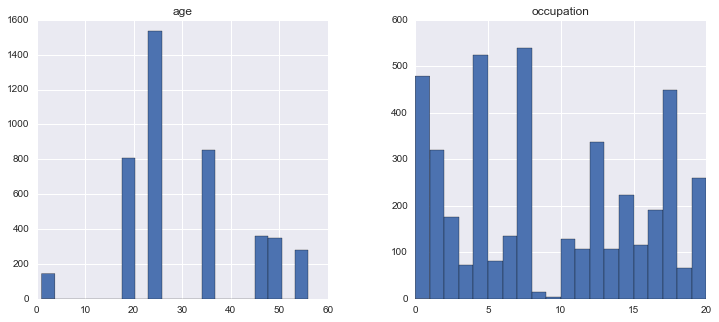

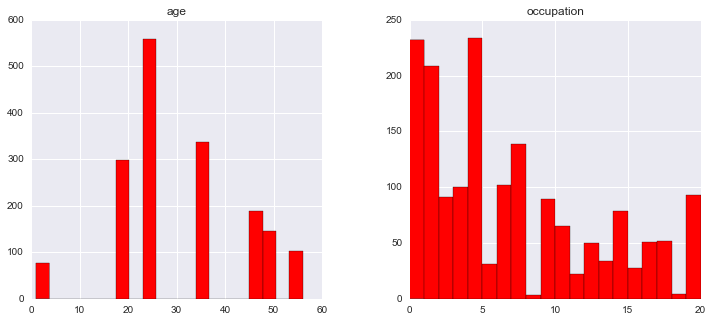

In [9]:
df_users[df_users['gender'] == 'M'][['age','occupation']].hist(bins=20, figsize=(12,5))
df_users[df_users['gender'] == 'F'][['age','occupation']].hist(bins=20, figsize=(12,5), color='r')
plt.show()

In [10]:
train = pd.read_csv('data/training_ratings.csv')

In [11]:
train.head()

,user,movie,rating,id
0,2783,1253,5,2783_1253
1,2783,589,5,2783_589
2,2783,1270,4,2783_1270
3,2783,1274,4,2783_1274
4,2783,741,5,2783_741


In [12]:
train.groupby('user')['rating'].count().sort_values().head(10)

user
3326    2
3038    2
3288    3
4273    3
2988    4
2822    4
3459    4
4467    5
5998    5
4610    5
Name: rating, dtype: int64

In [13]:
train.groupby(['id']).count().head(10)

,user,movie,rating
id,,,
2783_1019,1,1,1
2783_1077,1,1,1
2783_1097,1,1,1
2783_1127,1,1,1
2783_1196,1,1,1
2783_1199,1,1,1
2783_1200,1,1,1
2783_1210,1,1,1
2783_1214,1,1,1


In [14]:
#To get genres from df_movies
genres = set()
for m in df_movies.genre:
   genres.update(g for g in m.split('|'))
genres = sorted(genres)

#make a column for each genre
for genre in genres:
   df_movies[genre] = [genre in movie.split('|') for movie in df_movies.genre]

In [15]:
df_movies['year'] = df_movies['title'].apply(lambda x:x.split('(')[1][:-1])

In [16]:
df_movies.head()

,movie_id,title,genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,2,Jumanji (1995),Adventure|Children's|Fantasy,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
1,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,1995
2,4,Waiting to Exhale (1995),Comedy|Drama,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1995
3,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1995
4,6,Heat (1995),Action|Crime|Thriller,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,1995


In [17]:
occupations = pd.Series({ \
                        0: "other",
                        1:  "academic/educator",
                        2:  "artist",
                        3:  "clerical/admin",
                        4:  "college/grad student",
                        5:  "customer service",
                        6:  "doctor/health care",
                        7:  "executive/managerial",
                        8:  "farmer",
                        9:  "homemaker",
                        10:  "K-12 student",
                        11:  "lawyer",
                        12:  "programmer",
                        13:  "retired",
                        14:  "sales/marketing",
                        15:  "scientist",
                        16:  "self-employed",
                        17:  "technician/engineer",
                        18:  "tradesman/craftsman",
                        19:  "unemployed",
                        20:  "writer",
                        })

In [18]:
df_users.rename(columns={'user_id': 'user'}, inplace=True)
df_users['occupation'] = occupations[df_users.occupation].values
df_users.tail()

,user,gender,age,occupation,zip
6034,6036,F,25,scientist,32603
6035,6037,F,45,academic/educator,76006
6036,6038,F,56,academic/educator,14706
6037,6039,F,45,other,01060
6038,6040,M,25,doctor/health care,11106


In [19]:
df_users.groupby('occupation')['age'].median()

occupation
K-12 student             1
academic/educator       35
artist                  25
clerical/admin          35
college/grad student    18
customer service        25
doctor/health care      35
executive/managerial    35
farmer                  35
homemaker               35
lawyer                  35
other                   25
programmer              25
retired                 56
sales/marketing         25
scientist               25
self-employed           35
technician/engineer     25
tradesman/craftsman     35
unemployed              18
writer                  25
Name: age, dtype: int64